# Importamos las librerias necesarias 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score, auc, classification_report

# Data Frame a utilizar 

In [ ]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección 
# y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
# tras observar los datos del día de hoy, el objetivo es predecir las variables target:
# -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
# -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

# Análisis descriptivo de los datos

In [ ]:
### Vista de datos
df.head()
df.tail()
print("Tamaño: "+str(df.shape))

# Borramos columna de índices porque no la necesitamos, y además, tiene faltantes.
df.drop(df.columns[0], axis=1, inplace=True)
df.tail()

In [ ]:
# Columnas del dataframe
df.columns

In [ ]:
# Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
tipos_de_datos = df.dtypes

variables_categoricas = tipos_de_datos[df.dtypes == 'object'].index
variables_numericas = tipos_de_datos[df.dtypes != 'object'].index

print("Variables Categóricas:")
print(variables_categoricas)
print("\nVariables Numéricas:")
print(variables_numericas)

**Significado de las variables categóricas**

Date [String]: fecha de la muestra, expresada en AAAA-MM-DD.

Location [String]: ciudad donde se toma la muestra.

WindGustDir [String]: dirección desde la cual se registró la ráfaga de viento más fuerte.

WindDir9am [String]: dirección del viento a las 9am.

WindDir3pm [String]: dirección del viento a las 3pm.

RainToday [String]: indica si llovió ese día.

RainTomorrow [String] (OBJ): predice si lloverá al día siguiente.

In [ ]:
df.head()

In [ ]:
# new 
# Convertimos la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Luego, verificamos si los datos están ordenados por fecha de menor a mayor
if df['Date'].is_monotonic_increasing:
    print("Los datos están ordenados por fecha de menor a mayor.")
else:
    print("Los datos no están ordenados por fecha.")

In [ ]:
# new
# Como los datos no estan ordenados por fecha los ordenamos
df = df.sort_values(by='Date', ignore_index=True)

# Esto nos va servir para en el futuro dividir los datos de train y test en funcion de la fecha
# Por si nos sirve para despues guardamos la fecha que dividie a los datos en 80 y 20, 
# ya que luego la fecha la vamos a perder, porque la vamos a transformar

# Calculamos el cuantil que divide los datos en 80% para entrenamiento y 20% para prueba
quantile_80 = df['Date'].quantile(0.8)

print("Fecha que divide los datos en 80% para entrenamiento y 20% para prueba:", quantile_80)
# El índice 17778 es el último de nuestro dataset de training
print(df[df["Date"]==quantile_80])

In [ ]:
# Valores que asumen las variables categóricas.
print(df['Location'].unique())
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())
print(df['RainToday'].unique())
print(df['RainTomorrow'].unique())

**Significado de las variables numéricas**

-MinTemp: temperatura mínima registrada en ese día, en °C.

-MaxTemp: temperatura máxima registrada en ese día, en °C.

-Rainfall: cantidad de lluvia registrada ese día, en mm.

-Evaporation: cantidad de agua evaporada durante ese día, en mm.

-Sunshine: cantidad de horas de sol durante ese día.

-WindGustSpeed: velocidad máxima del viento registrada ese día, en km/h.

-WindSpeed9am: velocidad del viento registrada ese día a las 9am, en km/h.

-WindSpeed3pm: velocidad del viento registrada ese día a las 3pm, en km/h.

-Humidity9am: porcentaje de humedad en el aire a las 9am.

-Humidity3pm: porcentaje de humedad en el aire a las 3pm.

-Pressure9am: presión atmosférica registrada a las 9am, en hPa.

-Pressure3pm: presión atmosférica registrada a las 3pm, en hPa.

-Cloud9am: variable sin unidad, representando la cantidad de nubes registrada a las 9am.

-Cloud3pm: variable sin unidad, representando la cantidad de nubes registrada a las 3pm.

-Temp9am: temperatura registrada a las 9am, en °C.

-Temp3pm: temperatura registrada a las 3pm, en °C.

-RainfallTomorrow (OBJ): cantidad de lluvia registrada al día siguiente, en mm.

In [ ]:
# Ejecutamos algunos comandos para deducir las unidades de arriba.
df_filtered = df[df['Rainfall'] != 0]
promedio = df_filtered['Rainfall'].mean()
mediana = df_filtered['Rainfall'].median()
print("Promedio de 'Rainfall' después de filtrar los valores 0:", promedio)
print("Mediana de 'Rainfall' después de filtrar los valores 0:", mediana)

In [ ]:
# A continuación se muestran algunos datos de cada columna, como la cantidad de datos, media, desvío, cuartiles
# Solo sobre variables numéricas
df.describe()

En esta tabla podemos ver:
- count: cantidad todal de datos
- mean: media/promedio
- std: desvio estándar
- min: valor mínimo de los datos
- máx: valor máximo de los datos
- 25%: es el primer cuartil
- 50%: es el segundo cuartil o mediana
- 75% es el tercer cuartil
- max: es el valor máximo de los datos

In [ ]:
df.info()

In [ ]:
# De todas las ciudades que contiene el dataset solo nos quedamos con las filas que contienen las ciudad que nos interesan
# Ciudades de interés: Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport.

#Nos quemos con los datos de las locations que nos interesan
ciudades_deseadas = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para mantener solo las filas con las ciudades deseadas
df = df[df['Location'].isin(ciudades_deseadas)]
print("Nuevo tamaño: "+str(df.shape))

In [ ]:
#¿Cuántos datos hay de cada ciudad?
#Esto lo podríamos ordenar de ponerlo arriba donde estan los gráficos de la cantidad de datos por ciudad (gráfico violeta)
data_country= df.value_counts('Location')
print(data_country)

# Valores atípicos y faltanes

In [ ]:
# Cantidad de valores faltantes.
print(df.isna().sum())

# Tenemos un problema con ciertas columnas: Evaporation, Sunshine, y Cloudxxx tienen MUCHOS nulos.

# Veremos cómo completar las temperaturas:
#print(df[df['MinTemp'].isnull() & df['MaxTemp'].isnull() & df['Temp9am'].isnull() & df['Temp3pm'].isnull()])

# Vemos que cuando una temperatura es nula, casi siempre todas son nulas, así que no podemos usar uno de esos 
# datos para completar. Cambiemos de estrategia.


In [ ]:
# En los próximos pasos intentaremos bajar estos porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

In [ ]:
# Visualización de los nulos en una sección del dataframe
fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [ ]:
#Cantidad de nulos por Location
#Contamos la cantidad de valores nulos en cada Location y crea un nuevo DataFrame 
#En el nuevo DataFrame contine la Location y el total de valores nulos ("Total_Nulos") para cada grupo de ubicación en el DataFrame original
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print(null_counts_country)

In [ ]:
# Vamos a fusionar Sydney y Melbourne con sus aeropuertos, considerando que esto va a reducir los datos nulos.
df = df.sort_values(by='Date', ignore_index=True)
df_Sydney = df[(df["Location"]=="Sydney")]
df_aSydney = df[(df["Location"]=="SydneyAirport")]
df_Melbourne = df[(df["Location"]=="Melbourne")]
df_AMelbourne = df[(df["Location"]=="MelbourneAirport")]

# Hacemos un join outer sobre "Date" para mantener todos los registros
df_s = df_Sydney.merge(df_aSydney, on='Date', how='outer', suffixes=('', '_ASydney'))
df_m = df_Melbourne.merge(df_AMelbourne, on='Date', how='outer', suffixes=('', '_AMelbourne'))

# Eliminamos la columna Location_Aeropuerto que no necesitamos, y llenamos las vacías con lo que corresponda para cada ciudad
# (en caso de que el registro haya existido en el aeropuerto, y no en la ciudad)
df_s.drop("Location_ASydney", axis=1, inplace=True)
df_m.drop("Location_AMelbourne", axis=1, inplace=True)
df_s["Location"] = "Sydney"
df_m["Location"] = "Melbourne"

In [ ]:
# Generamos una lista de columnas numéricas y categóricas que tiene sentido ser completadas con los valores de los aeropuertos.
columnas_numericas = ['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm', "Rainfall", 'RainfallTomorrow', "WindGustSpeed","WindSpeed9am","WindSpeed3pm"]
columnas_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


# Completamos nulos para esas columnas, y a su vez las eliminamos
for columna in columnas_numericas+columnas_categoricas:
    columna_as = columna+"_ASydney"
    columna_am = columna+"_AMelbourne"
    df_s[columna] = df_s[columna].fillna(df_s[columna_as])
    df_m[columna] = df_m[columna].fillna(df_m[columna_am])
    df_s.drop(columna_as, axis=1, inplace=True)
    df_m.drop(columna_am, axis=1, inplace=True)


# Chequeemos que no rompimos nada a nivel columnas
print(df_m.shape[1] == df_s.shape[1])
print(df.shape[1] == df_s.shape[1])
#print(df_m.head())

print("Tamaño pre-mergeo: "+str(df.shape))
# Generemos el nuevo dataframe
df_without_sydney_melbourne = df[(df["Location"]!="Sydney")&(df["Location"]!="SydneyAirport")&(df["Location"]!="Melbourne")&(df["Location"]!="MelbourneAirport")]
df = pd.concat([df_without_sydney_melbourne, df_s, df_m], ignore_index=True)
print("Tamaño post-mergeo: "+str(df.shape))

# Mejoramos un poco los porcentajes?
porcentaje_nulos_2 = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas_2 = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres_2 = pd.DataFrame({'Nombre de columna': porcentaje_nulos_2.index, 'Porcentaje de nulos': porcentaje_nulos_2.values})

print("Nulos, por ciudad, pre mergeo con aeropuertos: ")
print(null_counts_country)
null_counts_country = df.groupby('Location').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total_Nulos')
print("Nulos, por ciudad, post mergeo con aeropuertos: ")
print(null_counts_country)


# Transformación de variables categóricas

In [ ]:
# Veamos sobre cuál hacer one hot encoding
columnas_object = df.select_dtypes(include=['object'])
print(columnas_object)

In [ ]:
# Elegimos estas:
palabrasObject = ["Location",  "RainToday", "RainTomorrow"]
df = pd.get_dummies(df, columns = palabrasObject, drop_first=True, dtype=int)
print(df)

In [ ]:
# Si imaginamos los puntos cardinales sobre un eje cartesiano, podemos codificar cada punto como un ángulo (polar).
# Codifiquemos: ["WindGustDir", "WindDir9am", "WindDir3pm"]
gust = list(df["WindGustDir"].unique())
am = list(df["WindDir9am"].unique())
pm = list(df["WindDir3pm"].unique())

values = ['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE', 'NNW', 'SW', 'W', 'WSW', 'SSW']
codes = [315, 67.5, 157.5, 135, 90, 180, 0, 292.5, 112.5, 45, 22.5, 337.5, 225, 270, 247.5, 202.5]
wind_coded = pd.DataFrame({'value': values, 'code': codes})

# Reemplazar los valores originales por los codificados
for columna in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[columna] = df[columna].replace(dict(zip(wind_coded['value'], wind_coded['code'])))

print(df.info())
print(df.head())

In [ ]:
"""
# Transformemos las fechas
df['Date'] = pd.to_datetime(df['Date'])
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day
df['Dia_Semana'] = df['Date'].dt.day_of_week
# Eliminamos la fecha del df
df.drop(columns= "Date", inplace=True, axis= 1)
anios = df.Ano.unique() 
print(f"Cantidad de años que tenemos datos: {len(anios)}. Estos son: {anios}",) """

# Cambiamos de enfoque porque consideramos necesario capturar con los datos "lo cíclico" de un año y los patrones
# propios de las estaciones del año.

# Convertimos la columna 'fecha' al tipo datetime si aún no lo está
df['Date'] = pd.to_datetime(df['Date'])

# Extraemos el día del año (1 a 365)
df['dia'] = df['Date'].dt.dayofyear

# Calculamos la característica trigonométrica (solo el seno)
df['dia'] = np.sin(2 * np.pi * df['dia'] / 365)

# Agregamos el año como una característica adicional
df['año'] = df['Date'].dt.year

#df.drop("Date", axis=1, inplace=True)

print(df.info())

In [ ]:
"""
# A continuación creamos una función que busca en el dataset las tempraturas del día anterior y
# del día posterior a este, y sino, del año anterior y posterior,
# y devuelve un promedio del par que corresponda.
#print(df)
def promedio(fech, location, data, columna):
    fecha = pd.to_datetime(fech)
    fecha_anio_anterior = (fecha - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_anio_posterior = (fecha + pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    fecha_dia_desp = (fecha + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    fecha_dia_ant = (fecha - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    
    x1 = data[(data['Date'] == fecha_dia_desp) & (data["Location"]==location)][columna]
    x2 = data[(data['Date'] == fecha_dia_ant) & (data["Location"]==location)][columna]
    x3 = data[(data['Date'] == fecha_anio_anterior) & (data["Location"]==location)][columna]
    x4 = data[(data['Date'] == fecha_anio_posterior) & (data["Location"]==location)][columna]

    datos1 = [df.iloc[0] for df in [x1, x2] if df.shape[0] != 0]
    datos2 = [df.iloc[0] for df in [x3, x4] if df.shape[0] != 0]

    # Si no hay dataframes no nulos, devolver None
    if len(datos1) == 0:
        if len(datos2) == 0:
            return None
        else:
            promedio = sum(datos2)/len(datos2)
            return promedio
    else:
        promedio = sum(datos1)/len(datos1)
        return promedio

z = promedio("2009-01-01", "Cobar", df, "MinTemp")
print(z)
"""

In [ ]:
print(df.info())

In [ ]:
# Volvamos a estos porcentajes, y cómo mejorarlos
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

A continuación rellenamos valores faltantes con los alguno de los tres días anteriores, o con el dato del año anterior o sus respectivos tres días anteriores, entendiendo que el mejor escenario es datos del corriente año, y no del anterior.

In [ ]:
cities = ['Location_Canberra', 'Location_Cobar', 'Location_Dartmoor', 'Location_Melbourne', 'Location_MountGambier', 'Location_Sydney']
df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]

df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

for city in df_cities:
    for variable in list(df.columns):
        # Rellenamos los valores nulos con el valor de los tres días anteriores (de este año o el anterior)
        # si existen (pues el df está ordenado por fecha)
        city[variable] = city[variable].fillna(city[variable].shift(-1))
        city[variable] = city[variable].fillna(city[variable].shift(-2))
        city[variable] = city[variable].fillna(city[variable].shift(-3))

        city[variable] = city[variable].fillna(city[variable].shift(-365))
        city[variable] = city[variable].fillna(city[variable].shift(-365-1))
        city[variable] = city[variable].fillna(city[variable].shift(-365-2))
        city[variable] = city[variable].fillna(city[variable].shift(-365-3))
df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())


In [ ]:
# Porcentajes
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

In [ ]:
df_training = df.head(17779)
print(df_training.tail(1))

In [ ]:
# Terminemos de completar faltantes con la mediana de los datos de entrenamiento, discriminando por ciudad
t_df_canberra = df_training[df_training["Location_Canberra"]==1]
t_df_cobar = df_training[df_training["Location_Cobar"]==1]
t_df_dartmoor = df_training[df_training["Location_Dartmoor"]==1]
t_df_melbourne = df_training[df_training["Location_Melbourne"]==1]
t_df_mountgambier = df_training[df_training["Location_MountGambier"]==1]
t_df_sydney = df_training[df_training["Location_Sydney"]==1]
t_df_adelaide = df_training[(df_training["Location_Canberra"]==0)&(df_training["Location_Cobar"]==0)&(df_training["Location_Dartmoor"]==0)&(df_training["Location_Melbourne"]==0)&(df_training["Location_MountGambier"]==0)&(df_training["Location_Sydney"]==0)]
t_df_cities = [t_df_adelaide,t_df_canberra,t_df_cobar,t_df_dartmoor,t_df_melbourne,t_df_mountgambier,t_df_sydney]

df_canberra = df[df["Location_Canberra"]==1]
df_cobar = df[df["Location_Cobar"]==1]
df_dartmoor = df[df["Location_Dartmoor"]==1]
df_melbourne = df[df["Location_Melbourne"]==1]
df_mountgambier = df[df["Location_MountGambier"]==1]
df_sydney = df[df["Location_Sydney"]==1]
df_adelaide = df[(df["Location_Canberra"]==0)&(df["Location_Cobar"]==0)&(df["Location_Dartmoor"]==0)&(df["Location_Melbourne"]==0)&(df["Location_MountGambier"]==0)&(df["Location_Sydney"]==0)]
df_cities = [df_adelaide,df_canberra, df_cobar, df_dartmoor, df_melbourne, df_mountgambier, df_sydney]

columns = ["WindGustDir", "WindGustSpeed", "WindDir9am", "Evaporation", "Humidity9am", "Humidity3pm", "Sunshine", "Cloud9am", "Cloud3pm"]

for i in range(len(df_cities)):
    for variable in columns:
        mediana = t_df_cities[i][variable].median()
        promedio_total = df_training[variable].mean()
        df_cities[i][variable].fillna(mediana, inplace=True)
        df_cities[i][variable].fillna(promedio_total, inplace=True)

df = pd.concat(df_cities)

fig, axes = plt.subplots(figsize = (15, 5))
sns.heatmap(df.isnull())

In [ ]:
# Porcentajes finales
porcentaje_nulos = (df.isnull().sum() / df.shape[0] * 100).round(2)
nombres_columnas = ['Nombre de columna', 'Porcentaje de nulos']
porcentaje_nulos_con_nombres = pd.DataFrame({'Nombre de columna': porcentaje_nulos.index, 'Porcentaje de nulos': porcentaje_nulos.values})
print(porcentaje_nulos_con_nombres)

# Matriz de Correlación

Con el fin de identificar patrones de correlación en los datos, calculamos la matriz de corrlación entre todas las columnas del df.
Vale aclarar que el coeficiente de correlación lo aplicamos entre la columna 'RainfallTomorrow' y las restantes columnas.
En este caso vamos analizar lo siguiente:
- Si el coeficiente de correlación es cercano a 1, indica una correlación positiva fuerte, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.
- Si el coeficiente de correlación es cercano a -1, indica una correlación negativa fuerte, lo que significa que a medida que una variable aumenta, la otra tiende a disminuir.
- Si el coeficiente de correlación es cercano a 0, indica que no hay una correlación lineal fuerte entre las dos variables.

In [ ]:
# Matriz de correlación entre todas las columnas y RainTomorrow_Yes
# Eliminamos las columnas que no vamos a predecir con el modelo de regresión
df_regresion = df.drop(columns = ["RainToday_Yes", "RainTomorrow_Yes"], axis= 1)
print(df_regresion.info())

* Entrenaremos nuestro modelo sin distinguir por ciudad, ya que la muestra que tomamos son de ciudades que pertenecen a la misma categoría climática de la clasificación Köppen-Geiger*

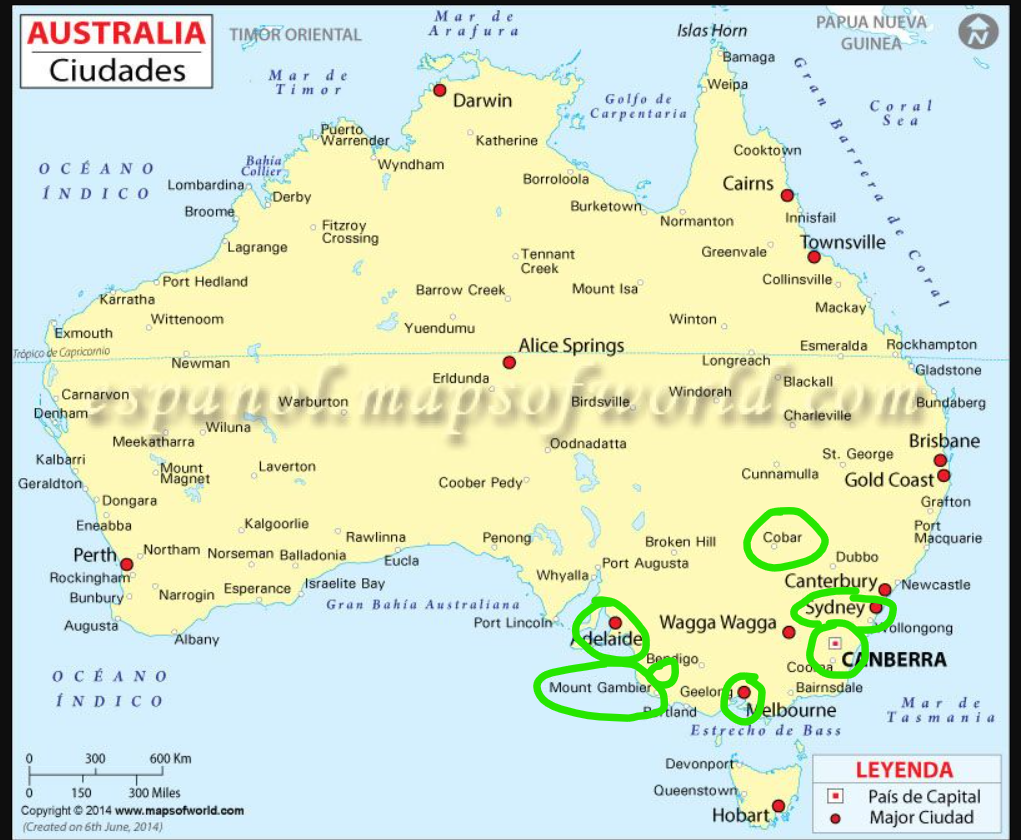
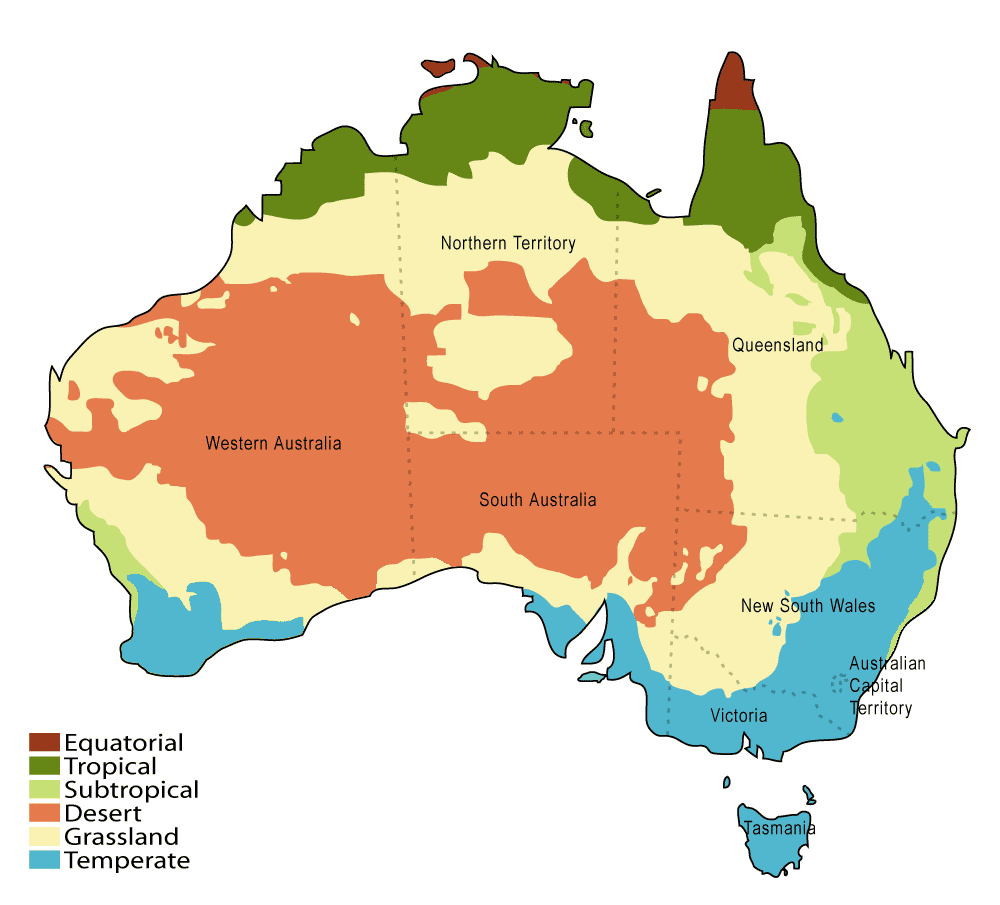

In [ ]:
todas_las_columnas = list(df_regresion.columns)
columnas = []
for i in todas_las_columnas:
    if "Location" not in i:
        columnas.append(i)

# Hacemos esto para que RainfallTomorrow quede primera y mejorar la visualización
columnas.remove("RainfallTomorrow")
columnas = ["RainfallTomorrow"] + columnas
corr = df_regresion[columnas].corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [ ]:
corr = df_regresion[columnas].corr()

# Calculamos los coeficientes de correlación en valor absoluto
corr_abs = corr.abs()

# Ordenamos los coeficientes de correlación en valor absoluto
corr_with_target_abs = corr_abs["RainfallTomorrow"].sort_values(ascending=False)
order = corr_with_target_abs.index

# Obtenemos las top 10 variables con mayor aporte
top_10_variables = order[1:11]  # Excluimos la variable "RainfallTomorrow" en sí misma

features = top_10_variables.tolist()
print('Variables con mayor correlación a RainfallTomorrow')
print(features)

Armamos un nuevo data set que solo contiene a esas columnas

In [ ]:
df_regresion = df_regresion.sort_values(by='Date', ignore_index=True)
data_new = df_regresion[features]


Separamos nuestro dataset en la variable independiente y las variables dependientes.
La variable dependiente es 'RailfallTomorrow' y las variables dependientes todas las demás columnas.

In [ ]:
X = data_new
y = df_regresion['RainfallTomorrow']
print(y.head())

In [ ]:
#¿Cuántas columnas tiene X? Es decir, ¿cuántas variables independientes tenemos?
len(X.columns)

In [ ]:
X_train = X.iloc[:17778]
X_test = X.iloc[17778:]
y_train = y.iloc[:17778]
y_test = y.iloc[17778:]

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_train.columns

In [ ]:
print(X_train.info())
print(y_train.info())

# Algoritmos de Regresión Lineal

## Regresión lineal

In [ ]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar. 
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos, recomendamos su uso aunque NO es estrictamente necesario, simplemente pueden usar los componentes por separado.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

El método fit que se utiliza a continuación ajusta el modelo a los datos de entrenamiento, lo que significa que el modelo aprenderá de los ejemplos de entrenamiento y ajustará sus parámetros internos de manera que sea capaz de hacer predicciones en función de esos datos.

In [ ]:
model.fit(X_train, y_train)

In [ ]:
lr = model.fit(X_train, y_train)

In [ ]:
model.steps[0]

In [ ]:
model.steps[1][1].n_features_in_

In [ ]:
#Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

In [ ]:
df_coeficientes

En el gráfico de tallo anterior podemos ver como influyen las distintas características a las predicciones. Podemos observar que la variable que más impacto tiene es 'Preassure3pm', seguida por 'Preassure9am' y 'Pressure3pm

In [ ]:
# Predicciones
y_pred = model.predict(X_test)
#predicciones = predicciones.flatten()
#predicciones[:10]
y_pred.shape, y_test.shape

Calculamos algunas métricas para evaluar el modelo

In [ ]:
# Error de test del modelo. Uso rmse para mantener la misma escala que la variable a predecir

rmse_ols = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error (rmse) de test es: ",rmse_ols.round(4))

Un RMSE de 5.4174 indica que, en promedio, las predicciones del modelo están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4174 unidades en la misma escala que los valores objetivo, es decir mm. Esto significa que, en promedio, las predicciones del modelo tienden a estar a unos 5.4174 mm de distancia de las etiquetas reales. Que en contextos de lluvia es relativamente poco.

In [ ]:
rl_R2 = metrics.r2_score(y_test, y_pred)
print('El coeficiente de regresión es: ',rl_R2.round(4))

Aproximadamente el 22% de la variabilidad de la variable dependiente puede ser explicada por la variabilidad de la variable independiente en un modelo de regresión.

Un R2 de 0.22 no es muy alto, lo que sugiere que el modelo no explica la mayoría de la variabilidad en la variable dependiente. Esto puede deberse a varias razones, como la falta de ajuste del modelo, la presencia de variables omitidas importantes, la presencia de errores de medición en los datos, entre otros factores.

Tambien calculamos esta métricas con los datos de train

In [ ]:
# new
y_pred_2 = model.predict(X_train)
rl_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_ols_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(rl_R2_train, rmse_ols_train)

In [ ]:
(y_test - y_pred).shape

In [ ]:
fig = plt.figure(figsize=(10,5))
  
sns.histplot((y_test - y_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)    
plt.show()

Vemos que el histograma muestra una distribución asimétrica, con una cola larga a la derecha, puede indicar que el modelo no está capturando completamente la variabilidad en los datos. Esto puede sugerir que el modelo tiene sesgos o que hay patrones no lineales en los datos que no se están teniendo en cuenta.
De todos modos se puede observar que los residuos tienen una distribución alrededor de cero, lo que significa que, en promedio, no debería haber un sesgo sistemático en las predicciones del modelo.

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,100*(y_test-y_pred)/y_test)
plt.show()

## Ridge

In [ ]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(StandardScaler(), 
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train, y_train)

In [ ]:
ridge = modelo.fit(X_train, y_train)

In [ ]:
# Evolución de los parámetros en función de alpha

alphas = modelo.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

En el gráfico anterior podemos observar que a medida que alpha aumenta, la regularización se vuelve más fuerte, y los coeficientes tienden a disminuir hacia cero. Esto es una característica de Ridge, que ayuda a evitar el sobreajuste al penalizar coeficientes más grandes.

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5,None])
ax.set_xlim([10,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

A medida que alpha aumenta (la regularización se vuelve más fuerte), el RMSE de CV tiende a aumentar. Esto se debe a que la regularización penaliza coeficientes más grandes, lo que puede hacer que el modelo se ajuste menos a los datos de entrenamiento.

In [ ]:
# Mejor valor alpha encontrado
alfa=mod.alpha_.round(4)
print(f"Mejor valor de alpha encontrado:", alfa)

Este es el valor específico de alpha que minimiza el error (RMSE) en el conjunto de validación cruzada. Indica cuánta regularización se debe aplicar al modelo para obtener un equilibrio óptimo entre el ajuste a los datos y la capacidad de generalización.

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

In [ ]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo 

rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

print("El error (rmse) de test es: ", rmse_ridge.round(4))

El error (RMSE) de test es: 5.4175 significa que, en promedio, las predicciones del modelo Ridge están desviadas de los valores reales en el conjunto de prueba por alrededor de 5.4175 unidades en la misma escala que los valores objetivo. Esto sugiere que el modelo Ridge tiene un rendimiento muy similar al modelo de regresión lineal utilizado anteriormente.

In [ ]:
ridge_R2 = metrics.r2_score(y_test, y_pred)
print("El coeficiente de regresión es de: ", ridge_R2.round(4))

Dado que el R-cuadrado del modelo Ridge es muy similar al R-cuadrado del modelo de regresión lineal, parece que ambos modelos tienen un rendimiento bastante similar en términos de su capacidad para explicar la variabilidad en los datos.

In [ ]:
# new
y_pred_2 = model.predict(X_train)
ridge_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_ridge_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(ridge_R2_train, rmse_ridge_train)

## Lasso Regression

In [ ]:
modelo = make_pipeline(StandardScaler(), 
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train, y_train)

In [ ]:
lasso = modelo.fit(X_train, y_train)

In [ ]:
# Evolución de los parámetros en función de alpha

mod = modelo.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

In [ ]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

In [ ]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([5.5,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [ ]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo 

rmse_lasso = mean_squared_error(y_test,y_pred,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")

In [ ]:
lasso_R2 = metrics.r2_score(y_test, y_pred)
lasso_R2

In [ ]:
# new
y_pred_2 = model.predict(X_train)
lasso_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_lasso_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(lasso_R2_train, rmse_lasso_train)

In [ ]:
# Esto lo coreemos para ver como nos estan dando los valores --> borrarlo posteriormente
print(rl_R2)
print(ridge_R2)
print(lasso_R2)
print(rmse_ols)
print(rmse_lasso)
print(rmse_ridge)

## ElasticNet

In [ ]:
modelo = make_pipeline(StandardScaler(), 
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]

In [ ]:
# Como lo anterior no se puede mostrar, lo mostramos de la siguiente forma
import pprint

# Imprimir el modelo detalladamente
pprint.pprint(mod)

In [ ]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

El gráfico muestra una curva que representa cómo cambia el RMSE de CV a medida que varía el valor de l1_ratio. Esta curva te permite identificar el valor óptimo de l1_ratio que minimiza el RMSE de CV y, por lo tanto, proporciona el mejor rendimiento del modelo.

In [ ]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: ", mod.alpha_.round(4))
print(f"Mejor valor de l1_ratio encontrado:", mod.l1_ratio_)

In [ ]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

In [ ]:
# Predicciones test
y_pred = modelo.predict(X_test)

In [ ]:
# Error de test del modelo 

rmse_elastic = mean_squared_error(y_test,y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")

In [ ]:
elasticnet_R2 = metrics.r2_score(y_test, y_pred)
elasticnet_R2.round(4)

In [ ]:
# new
y_pred_2 = model.predict(X_train)
elasticnet_R2_train = metrics.r2_score(y_train, y_pred_2)
rmse_elasticnet_train = mean_squared_error(y_train, y_pred_2, squared = False)
print('Métricas de entrenamiento')
print(elasticnet_R2_train, rmse_elasticnet_train)

# Comparación de los distintos modelos

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
print([rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic])

In [ ]:
print([rl_R2, lasso_R2, ridge_R2, elasticnet_R2])

No existe demasiada variabilidad entre los modelos, el resultado es similar en todos ellos.

In [ ]:
#new 
data = {
    'método': ['Regresion Lineal', 'Ridge', 'Lasso', 'ElasticNet'],
    'r2 test': [rl_R2, ridge_R2, lasso_R2, elasticnet_R2],
    'rmse test': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic],
    'r2 train': [rl_R2_train, ridge_R2_train, lasso_R2_train, elasticnet_R2_train],
    'rmse train': [rmse_ols_train, rmse_ridge_train, rmse_lasso_train, rmse_elasticnet_train]
}

# Crear el DataFrame
metrics = pd.DataFrame(data)

# Mostrar el DataFrame
print(metrics)

Vemos que para cada caso las métricas calculados con los datos de test y de entramiento son muy similares, esto nos dice que los modelos han logrado un buen ajuste en los datos de entrenamiento como en los de prueba.
Estos podría indicarnos que nuestros modelos son capaces de generalizar bien a nuevos datos.

# Gradiente descendiente


In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [ ]:
from sklearn.preprocessing import StandardScaler

def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=100, batch_size=32):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    n = X_train_scaled.shape[0]
    m = X_train_scaled.shape[1]

    X_train_scaled = np.hstack((np.ones((n, 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        permutation = np.random.permutation(n)
        X_train_shuffled = X_train_scaled[permutation]
        y_train_shuffled = y_train[permutation]

        for j in range(0, n, batch_size):
            x_batch = X_train_shuffled[j:j+batch_size, :]
            y_batch = y_train_shuffled[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test_scaled, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W


In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [ ]:
data_new.head()

Para este modelo decidimos comparar con la primera columna

In [ ]:
df_regresion.drop(columns="Date", inplace=True)
print(df_regresion.info())

In [102]:
X,y = df['RainTomorrow_Yes'].values.reshape(-1,1),df['RainfallTomorrow'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

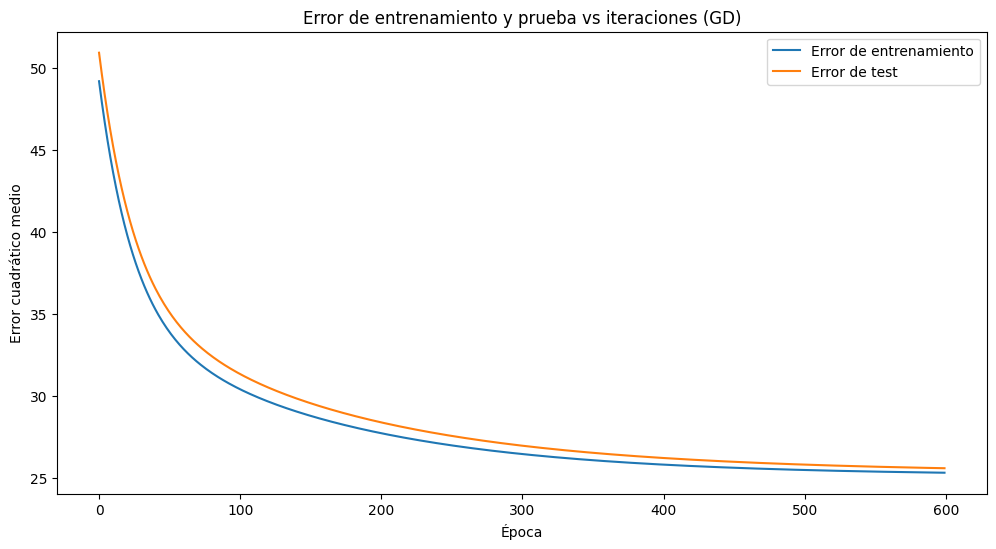

array([[0.38679325],
       [6.92647232]])

In [103]:
gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=600)

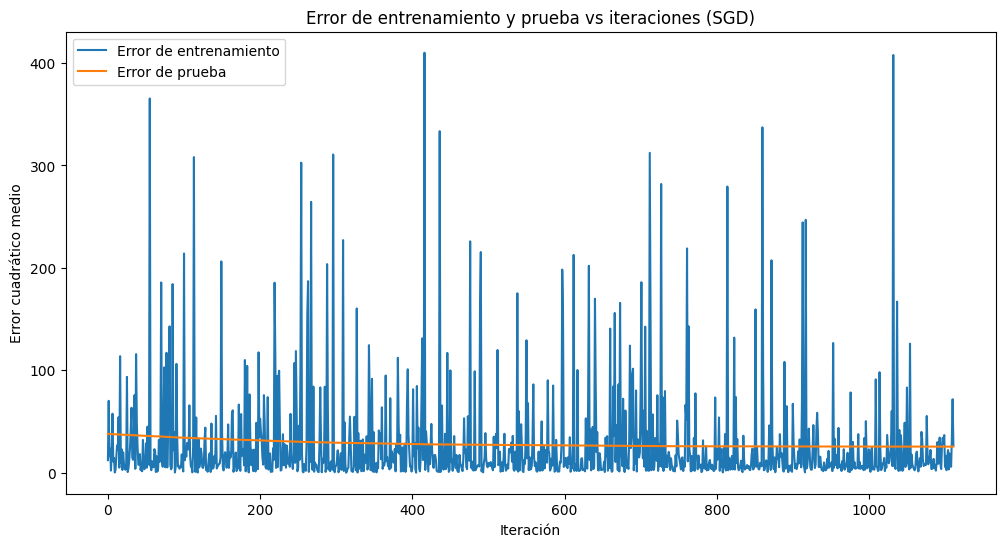

array([[1.82646063],
       [3.00291723]])

In [104]:
stochastic_gradient_descent(X_train, y_train, X_test, y_test, epochs=2)

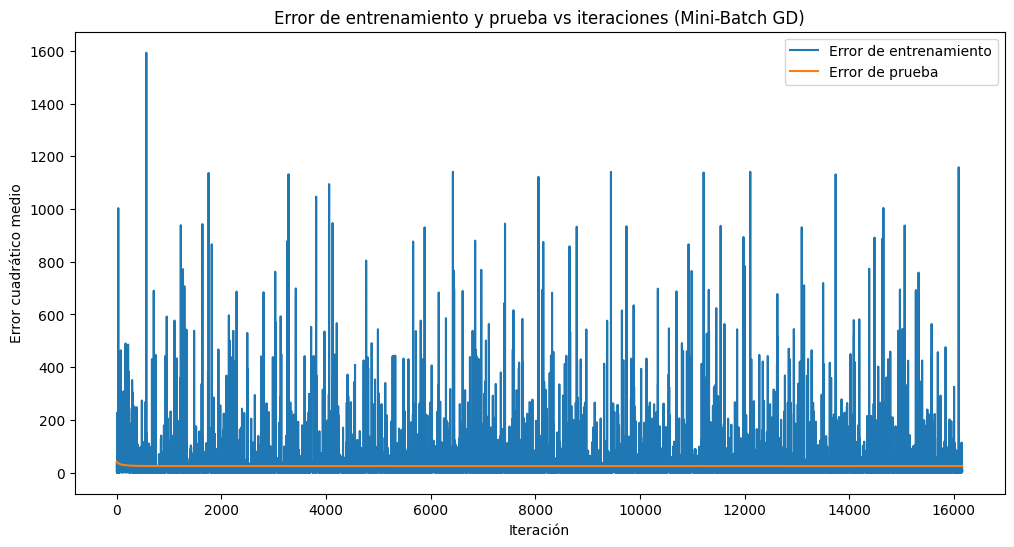

array([[0.01589186],
       [7.65214266]])

In [105]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, epochs=10)

In [106]:
# new
# updated df with df_regresion
X_train, X_test, y_train, y_test = train_test_split(df_regresion,
                                             df['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,
                                             )

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17773, 28), (4444, 28), (17773, 1), (4444, 1))

C:\Users\franc\AppData\Local\Temp\ipykernel_17076\602047562.py:31: RuntimeWarning: overflow encountered in square
  train_mse = np.mean(error_train ** 2)
C:\Users\franc\AppData\Local\Temp\ipykernel_17076\602047562.py:37: RuntimeWarning: overflow encountered in square
  test_mse = np.mean(error_test ** 2)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\franc\AppData\Local\Temp\ipykernel_17076\602047562.py:28: RuntimeWarning: invalid value encountered in matmul
  prediction_train = np.matmul(X_train, W)
C:\Users\franc\AppData\Local\Temp\ipykernel_17076\602047562.py:35: RuntimeWarning: invalid value encountered in matmul
  prediction_test = np.matmul(X_test, W)
C:\Users\franc\AppData\Local\Temp\ipykernel_17076\602047562.py:41: RuntimeWarning: invalid value encountered in multiply
  grad_sum = np.sum(error_train * X_train,

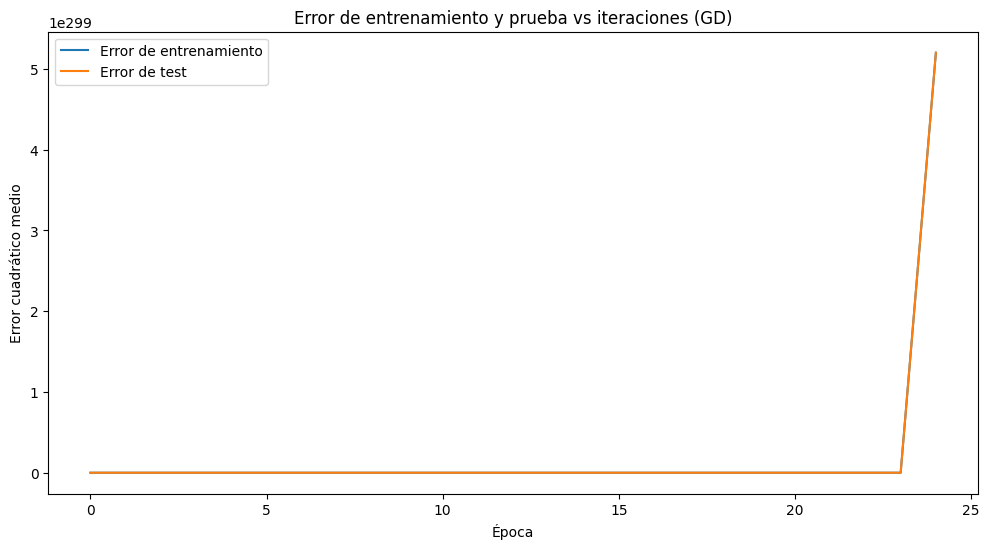

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [108]:
gradient_descent(X_train, y_train, X_test, y_test, epochs=200, lr=0.1)

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

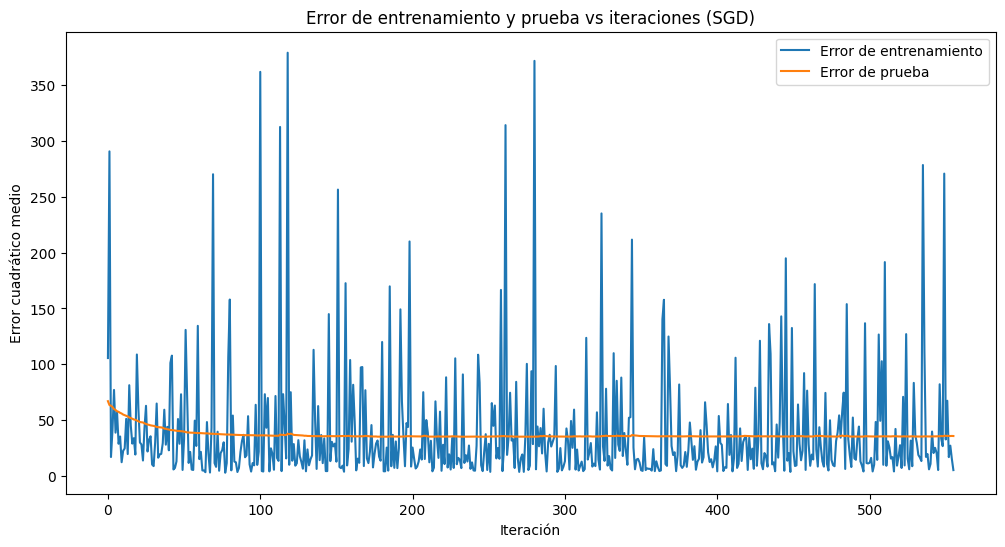

array([[ 2.07066115],
       [-0.02080655],
       [-0.28853069],
       [-0.10352455],
       [-0.08635922],
       [ 0.04713767],
       [ 0.0569314 ],
       [-0.07482632],
       [-0.3299426 ],
       [-0.0831221 ],
       [-0.24564025],
       [ 0.05420383],
       [-0.25427762],
       [-0.07028484],
       [ 0.02308931],
       [-0.02683901],
       [-0.26106699],
       [-0.23111823],
       [ 0.14972131],
       [ 0.11253526],
       [ 0.22497468],
       [ 0.1599818 ],
       [-0.01565939],
       [-0.11683483],
       [ 0.33676065],
       [ 0.02110907],
       [ 0.05898999],
       [ 0.21770856],
       [ 0.59765866]])

In [110]:
# lr = 0.001 es muy chico, 0.1 muy grande
stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=1, lr=0.01)

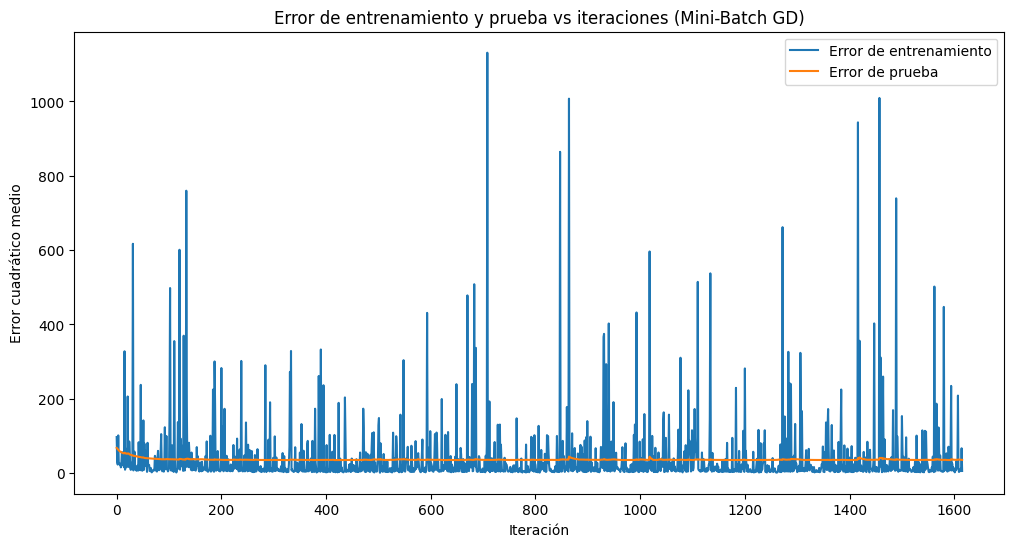

array([[ 2.01360149],
       [ 0.05636852],
       [-0.76797339],
       [ 0.11655957],
       [ 0.60892054],
       [ 0.05480683],
       [ 0.11395278],
       [ 0.04259825],
       [ 0.03172721],
       [-0.31480413],
       [-0.43218224],
       [ 0.03083751],
       [-0.0786209 ],
       [ 0.23820393],
       [ 0.14097548],
       [-0.09327748],
       [ 0.14147595],
       [ 0.4268709 ],
       [-0.25758088],
       [ 0.71162014],
       [-0.06369577],
       [ 0.03374235],
       [ 0.0727408 ],
       [-0.02780587],
       [-0.07321917],
       [-0.01422697],
       [ 0.50746331],
       [ 0.12119492],
       [ 0.40218129]])

In [111]:
mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, epochs=1, lr=0.01)

- Comportamiento de los errores de entrenamiento y prueba a lo largo de las épocas/iteraciones:

Para Gradiente Descendiente, vemos que el error de entrenamiento y test baja significativamente hasta las 300 epochs, estabilizándose alrededor de las 600 en un valor de 25.
Para Gradiente Descendiente Estocástico, vemos un comportamiento errático en los errores de entrenamiento, propios del método, pero vemos al error de prueba rápidamente estabilizado también alrededor de 25.
Para Mini-Batch, sucede algo similar que para gradiente descendiente estocástico: observamos una mayour volatilidad en los errores de prueba, y la misma estabilidad del error de test a través de las iteraciones.

No hay indicios de overfitting, ya que el error en entrenamiento y test no es muy distante. El problema es que el modelo no es demasiado explicativo del problema.

Experimentamos con las epochs y los lr, encontrando un buen balance en los valores ejecutados en este script.

# Correcciones

Cambios que hicimos de la entrega 1 a la entrega 2:
- Ordenamos los datos a partir de la fecha de forma creciente --> esto lo hacemos para rehacer la division en train y test (ver si es necesario)
- Agregamos las métricas para los datos de train

Todo el codigo que se modifico se encuentra con un comentario #new para poder diferenciarlo más rapidamente.

# Algoritmos de Clasificación 

## Regresión Logística

In [151]:
df_clasification = df.sort_values(by='Date', ignore_index=True)
todas_las_columnas = list(df_clasification.columns)
columnas = []
for i in todas_las_columnas:
    if "Location" not in i and "RainfallTomorrow" not in i and "Date" not in i:
        columnas.append(i)
df_clasification = df_clasification[columnas]
print(df_clasification.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           22217 non-null  float64
 1   MaxTemp           22217 non-null  float64
 2   Rainfall          22217 non-null  float64
 3   Evaporation       22217 non-null  float64
 4   Sunshine          22217 non-null  float64
 5   WindGustDir       22217 non-null  float64
 6   WindGustSpeed     22217 non-null  float64
 7   WindDir9am        22217 non-null  float64
 8   WindDir3pm        22217 non-null  float64
 9   WindSpeed9am      22217 non-null  float64
 10  WindSpeed3pm      22217 non-null  float64
 11  Humidity9am       22217 non-null  float64
 12  Humidity3pm       22217 non-null  float64
 13  Pressure9am       22217 non-null  float64
 14  Pressure3pm       22217 non-null  float64
 15  Cloud9am          22217 non-null  float64
 16  Cloud3pm          22217 non-null  float6

In [152]:
# xc yc la c hace referencia a clasificacion
Xc = df_clasification.drop(columns="RainTomorrow_Yes")
yc = df_clasification['RainTomorrow_Yes']
print(Xc.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday_Yes', 'dia', 'año'],
      dtype='object')


In [153]:
Xc_train = Xc.iloc[:17778]
Xc_test = Xc.iloc[17778:]
yc_train = yc.iloc[:17778]
yc_test = yc.iloc[17778:]

In [154]:
#Proporcion de dias que llueve en los datos de train
print(yc_train.sum()/17778)

0.23658454269321633


In [155]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(Xc_train, yc_train)

# Realizar predicciones en el conjunto de prueba
yc_pred = model.predict(Xc_test)

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
model

LogisticRegression(random_state=42)

C:\Users\franc\AppData\Local\Temp\ipykernel_17076\246789399.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="RainTomorrow_Yes", y=features[0],


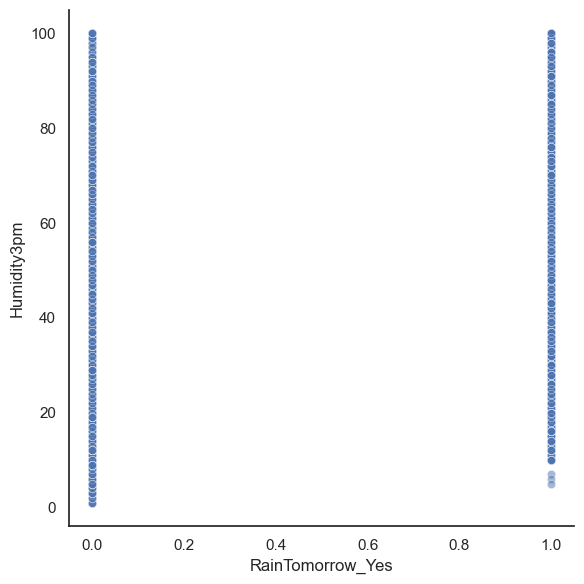

In [157]:
# Ploteos de las clases vs algún feature (las más correlacionadas según regresión lineal)
sns.set(style="white")

sns.relplot(x="RainTomorrow_Yes", y=features[0],
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df_clasification)

C:\Users\franc\AppData\Local\Temp\ipykernel_17076\255624712.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="RainTomorrow_Yes", y=features[5],


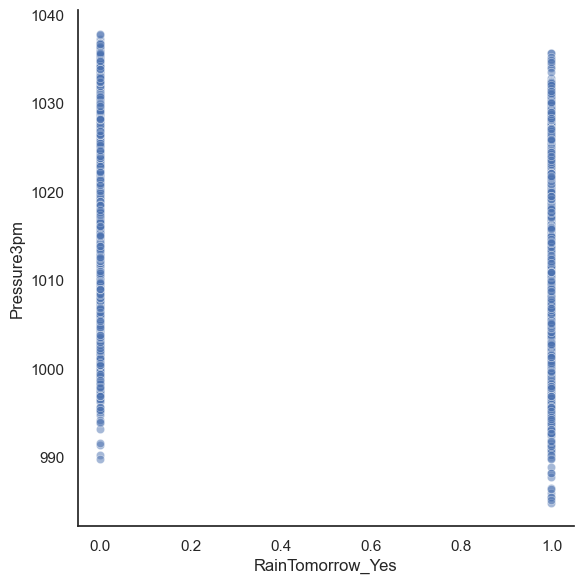

In [158]:
# Ploteos de las clases vs algún feature

sns.relplot(x="RainTomorrow_Yes", y=features[5],
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df_clasification)

C:\Users\franc\AppData\Local\Temp\ipykernel_17076\978828965.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="RainTomorrow_Yes", y="Rainfall",


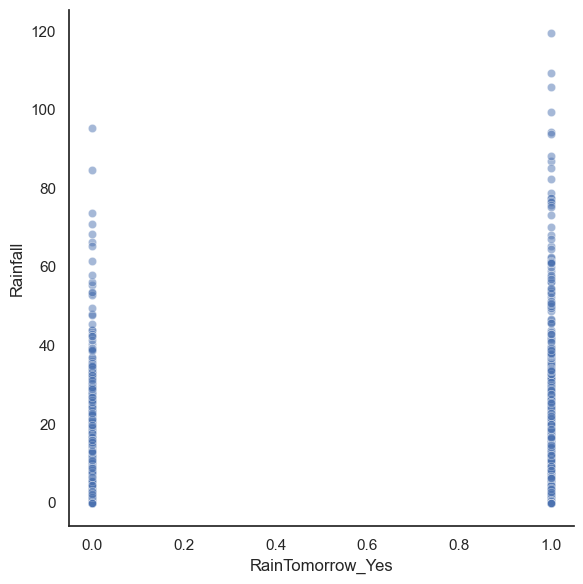

In [159]:
# Ploteos de las clases vs algún feature

sns.relplot(x="RainTomorrow_Yes", y="Rainfall",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=df_clasification)

A priori, no vemos una variable que nos permita decidir fácilmente si va a llover o no al día siguiente.

Que llueva hoy, ¿implica que lloverá mañana?

In [160]:
positivos = df_clasification[(df_clasification["RainToday_Yes"]==1) & (df_clasification["RainTomorrow_Yes"]==1)]
negativos = df_clasification[(df_clasification["RainToday_Yes"]==1) & (df_clasification["RainTomorrow_Yes"]==0)]

n = positivos.shape[0]
m = negativos.shape[0]
print(f"Implicancia: {int(n/(n+m)*100)}%.")

Implicancia: 46%.


¿Puedo predecir mañana con la lluvia de hoy?

In [161]:
positivos = df_clasification[(df_clasification["RainToday_Yes"]==df_clasification["RainTomorrow_Yes"])]

n = positivos.shape[0]
m = df_clasification.shape[0]
print(f"Igualdad: {int(n/(m)*100)}%.")

Igualdad: 74%.


Este podría ser un buen modelo base!

In [162]:
print("Resultados con regresión logística\n")
print(classification_report(yc_test, yc_pred))
print(confusion_matrix(yc_test, yc_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3426
           1       0.73      0.53      0.61      1013

    accuracy                           0.85      4439
   macro avg       0.80      0.74      0.76      4439
weighted avg       0.84      0.85      0.84      4439

[[3230  196]
 [ 477  536]]


El accuracy indica cuán buenas son tus predicciones de forma global. Es una métrica especialmente útil cuando el dataset está balanceado.

La *precisión* releva, sobre todo, los Falsos Positivos (predecir que llueve cuando en realidad no llovió).

El *recall* releva, sobre todo, los Falsos Negativos (predecir que no llueve cuando en realidad sí llueve).

El *F1-Score* mantiene un buen balance entre ambas. Lo usaremos para medir cuán bueno es nuestro modelo de forma general, pero prestaremos especial atención al recall de la clase 1.

Teniendo en cuenta que nuestro dataset se encuentra desbalanceado y que nos interesan no dar falsos negativos (decir que no va llover y que si llueva) elegimos F1-Score y recall sobre la clase 1.

In [163]:
lluvia = df_clasification[df_clasification["RainToday_Yes"]==True].shape[0]
total = df_clasification.shape[0]

print(f"Días lluviosos: {int(lluvia/(total)*100)}%.")

Días lluviosos: 23%.


Podemos observar que la columna target está desbalanceada, ya que como muestra el dataset (y como sucede normalmente), hay más días sin lluvia que días lluviosos. Veamos si nuestro modelo mejora al balancear los datos usando el argumento opcional _class_weight_ de sktlearn.

**¿Qué hace este argumento?**

class_weightdict = ‘balanced’

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [176]:
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(Xc_train, yc_train)
yc_pred_balanced = model.predict(Xc_test)

print("Resultados con regresión logística y dataset balanceado\n")
print(classification_report(yc_test, yc_pred_balanced))
print("________")
print(confusion_matrix(yc_test, yc_pred_balanced))

Resultados con regresión logística y dataset balanceado

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3426
           1       0.54      0.76      0.63      1013

    accuracy                           0.79      4439
   macro avg       0.73      0.78      0.74      4439
weighted avg       0.83      0.79      0.81      4439

________
[[2759  667]
 [ 245  768]]


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hagamos otro modelo balanceando el dataset con ROS, es decir, creando nuevos registros con lluvia de hoy.

In [168]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Probamos otro metodo de balanceo

# Tomamos mas valores de la clase minoritaria
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(Xc_train, yc_train)


In [169]:
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])
### El oversampler no hizo nada con los datos que tienen y=1, pero sí generó muchos datos nuevos con y=0.

(13572, 13572)

In [179]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)
yc_pred_ros = logistic_model.predict(Xc_test)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(yc_test, yc_pred_ros))
print(confusion_matrix(yc_test, yc_pred_ros))

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3426
           1       0.53      0.78      0.63      1013

    accuracy                           0.79      4439
   macro avg       0.72      0.79      0.74      4439
weighted avg       0.83      0.79      0.80      4439

[[2718  708]
 [ 226  787]]


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Observamos que, con clases balanceadas, empeoramos el accuracy (0.85 a 0.79) por lo que empeoramos las predicciones en general (ergo, la precision), pero sobre la clase 1 (predecir correctamente los días donde sí llovió) mejoramos el recall (de 0.53 a 0.76 y a 0.78) y el levemente el f1-score (de 0.61 a 0.63); obtenemos así un modelo más robusto y útil para el objetivo deseado.

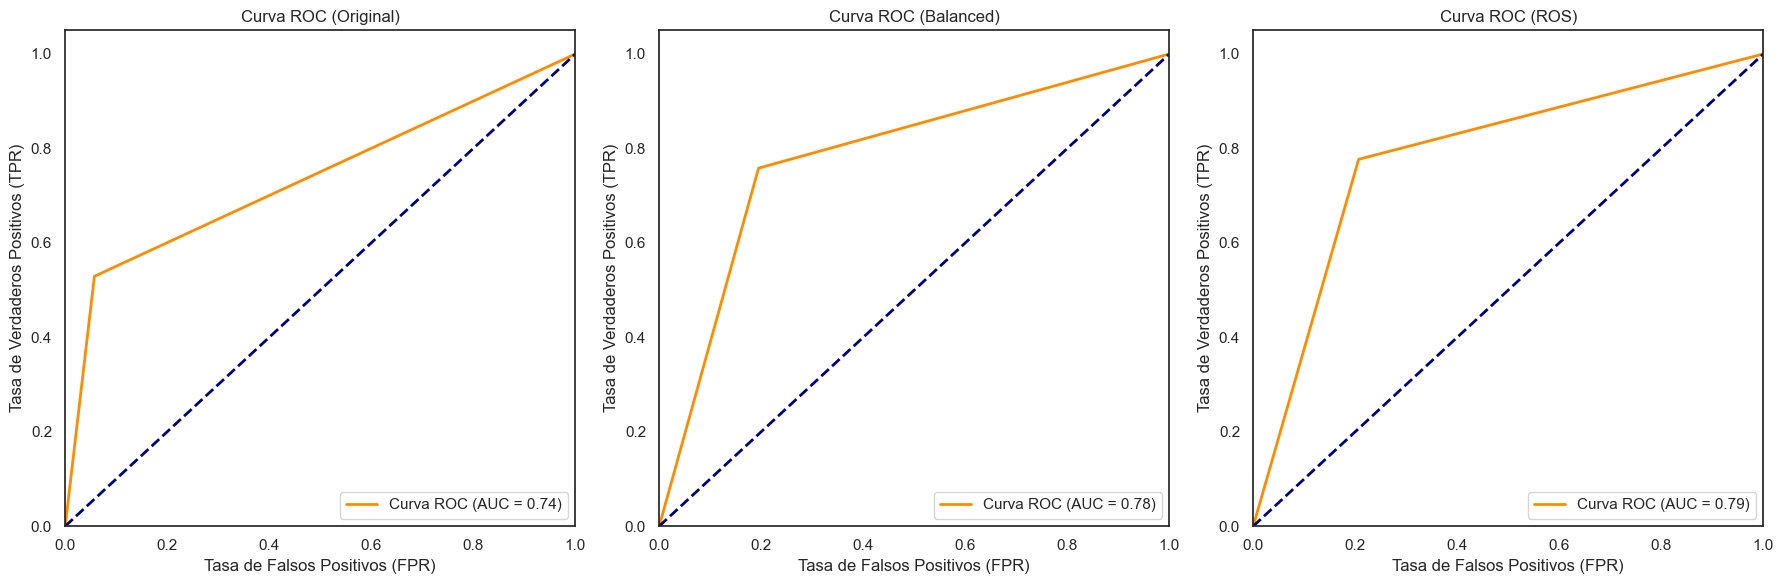

In [183]:
# Crear una figura con tres subgráficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Primer gráfico: Curva ROC para yc_pred
fpr, tpr, thresholds = roc_curve(yc_test, yc_pred)
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[0].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[0].set_title('Curva ROC (Original)')
axes[0].legend(loc="lower right")

# Segundo gráfico: Curva ROC para yc_pred_balanced
fpr, tpr, thresholds = roc_curve(yc_test, yc_pred_balanced)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[1].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[1].set_title('Curva ROC (Balanced)')
axes[1].legend(loc="lower right")

# Tercer gráfico: Curva ROC para yc_pred_ros
fpr, tpr, thresholds = roc_curve(yc_test, yc_pred_ros)
roc_auc = auc(fpr, tpr)
axes[2].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[2].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[2].set_title('Curva ROC (ROS)')
axes[2].legend(loc="lower right")

# Ajustar el layout
plt.tight_layout()
plt.show()

Podemos ver, no solo una mejora no despreciable en el área bajo la curva (AUC), sino que un incremento considerable en la tasa de verdaderos positivos, acercándonos al objetivo (1,1).

In [193]:
print(f"El mejor umbral para maximizar el recall es: {tpr[1]}")

El mejor umbral para maximizar el recall es: 0.7769002961500494
